### *Sql query

You are a member of the Data Analyst team at Austin Smart City and working on a project to analyze the city's waste disposal and management system. As a team member, based on the available data, try to analyze the data using descriptive and inferential statistics, and provide insight to the Austin city government about the condition of the waste disposal and management system. Use the following guidelines/steps to make your analysis easier.

# Problem 1 (Stats)

## I. Data Preprocessing

### a. Import libraries and loading data

In [1]:
# Import necessary libraries
import pandas as pd

In [2]:
# Loading data
raw_data = pd.read_csv('h8dsft_P0GC2_samuel_naiborhu.csv')

In [3]:
# show data headers
raw_data.head()

,report_date,load_time,load_type,load_weight,dropoff_site
0,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
1,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
2,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
3,2021-01-01,2021-01-01 12:00:00 UTC,SWEEPING,NaN,ONION CREEK
4,2021-01-02,2021-01-02 09:24:00 UTC,TIRES,1640.0,MRF


In [4]:
# show data tails
raw_data.tail()

,report_date,load_time,load_type,load_weight,dropoff_site
26152,2021-07-09,2021-07-09 09:48:00 UTC,BRUSH,8240.0,HORNSBY BEND
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26154,2021-07-09,2021-07-09 11:55:00 UTC,BRUSH,4340.0,HORNSBY BEND
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26156,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,3040.0,TDS LANDFILL


### b. Cleaning Data

In [5]:
raw_data.sort_values(by='load_time', ascending=True)

,report_date,load_time,load_type,load_weight,dropoff_site
20646,2021-05-27,2020-06-27 01:00:00 UTC,RECYCLING - SINGLE STREAM,5780.0,BALCONES RECYCLING
20654,2021-05-27,2020-06-27 01:33:00 UTC,RECYCLING - SINGLE STREAM,4620.0,BALCONES RECYCLING
20652,2021-05-27,2020-06-27 01:45:00 UTC,RECYCLING - SINGLE STREAM,18180.0,BALCONES RECYCLING
20645,2021-05-27,2020-06-27 09:30:00 UTC,RECYCLING - SINGLE STREAM,4380.0,BALCONES RECYCLING
20655,2021-05-27,2020-06-27 12:35:00 UTC,RECYCLING - SINGLE STREAM,15680.0,BALCONES RECYCLING
...,...,...,...,...,...
26155,2021-07-09,2021-07-09 12:00:00 UTC,LITTER,1900.0,TDS LANDFILL
26153,2021-07-09,2021-07-09 12:02:00 UTC,BRUSH,4160.0,HORNSBY BEND
26147,2021-07-09,2021-07-09 12:39:00 UTC,BRUSH,7140.0,HORNSBY BEND
25046,2021-06-30,2021-07-11 07:07:42 UTC,GARBAGE COLLECTIONS,17200.0,TDS LANDFILL


if we view the data sort by load time we can find there is data before 2021, since we only need data in 2021, we're going to drop them

In [6]:
# drop data before 2021
raw_data = raw_data[raw_data['load_time'] > '2021-01-01 00:00:00 UTC']

In [7]:
# recheck data before 2021
raw_data[raw_data['load_time'] < '2021-01-01 00:00:00 UTC']

,report_date,load_time,load_type,load_weight,dropoff_site


In [8]:
# check null values
raw_data.isnull().sum()

report_date        0
load_time          0
load_type          0
load_weight     1048
dropoff_site       0
dtype: int64

##### Replace null values with median values per load type group

Instead of using median on the whole data for fillna, we use the median on every load_type. In case we want to do some more detailed analysis later.

In [9]:
# check unique values
raw_data['load_type'].unique()

array(['SWEEPING', 'TIRES', 'RECYCLING - SINGLE STREAM', 'YARD TRIMMING',
       'BULK', 'DEAD ANIMAL', 'GARBAGE COLLECTIONS', 'MIXED LITTER',
       'ORGANICS', 'BRUSH', 'RECYCLED METAL', 'LITTER',
       'CONTAMINATED RECYCLING', 'CONTAMINATED ORGANICS'], dtype=object)

In [10]:
# check unique values count
raw_data['load_type'].value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

In [11]:
# make new group for median
median_load_type_group = raw_data[['load_type', 'load_weight']]

median_load_type_group

,load_type,load_weight
0,SWEEPING,NaN
1,SWEEPING,NaN
2,SWEEPING,NaN
3,SWEEPING,NaN
4,TIRES,1640.0
...,...,...
26152,BRUSH,8240.0
26153,BRUSH,4160.0
26154,BRUSH,4340.0
26155,LITTER,1900.0


In [12]:
# get median for every load type
median_load_type_group = median_load_type_group.groupby(['load_type'])['load_weight'].median().reset_index()

In [13]:
# Summarize the median per load type
median_load_type_group

,load_type,load_weight
0,BRUSH,6180.0
1,BULK,8040.0
2,CONTAMINATED ORGANICS,25380.0
3,CONTAMINATED RECYCLING,5160.0
4,DEAD ANIMAL,100.0
5,GARBAGE COLLECTIONS,18130.0
6,LITTER,2780.0
7,MIXED LITTER,2900.0
8,ORGANICS,11920.0
9,RECYCLED METAL,460.0


In [14]:
# Copy raw_data
raw_data_2 = raw_data.copy()

In [15]:
# Fillna with medians of every load_type
raw_data_2['load_weight'] = raw_data_2.groupby(['load_type'], sort=False)['load_weight'].apply(lambda x: x.fillna(x.median()))


In [16]:
raw_data_2.isnull().sum()

report_date     0
load_time       0
load_type       0
load_weight     0
dropoff_site    0
dtype: int64

In [17]:
cleaned_data = raw_data_2.copy().reset_index()

## II. Data Exploration

In [18]:
# view report date span with load_weight per day
date_span = cleaned_data[['report_date', 'load_weight']]
date_span

date_span_group = date_span.groupby(['report_date'])['load_weight'].sum().reset_index()
date_span_group

,report_date,load_weight
0,2021-01-01,37240.0
1,2021-01-02,2198060.0
2,2021-01-04,2920260.0
3,2021-01-05,2397850.0
4,2021-01-06,2443100.0
...,...,...
161,2021-07-05,1897290.0
162,2021-07-06,1977500.0
163,2021-07-07,1636870.0
164,2021-07-08,1520060.0


from the table above, we can see there are 166 day reports

In [19]:
# Type of garbage in austin and how many times garbage type reported
cleaned_data['load_type'].value_counts()

GARBAGE COLLECTIONS          8241
RECYCLING - SINGLE STREAM    6754
ORGANICS                     5763
BULK                         1594
BRUSH                        1517
SWEEPING                     1390
MIXED LITTER                  329
TIRES                         175
DEAD ANIMAL                   150
YARD TRIMMING                 137
RECYCLED METAL                 57
LITTER                         41
CONTAMINATED RECYCLING          1
CONTAMINATED ORGANICS           1
Name: load_type, dtype: int64

In [20]:
# dropoff sites
pd.DataFrame(pd.unique(cleaned_data['dropoff_site']))

,0
0,ONION CREEK
1,MRF
2,TDS - MRF
3,HORNSBY BEND
4,TDS LANDFILL
5,ORGANICS BY GOSH
6,BALCONES RECYCLING
7,AUSTIN IRON AND METAL
8,PARK CENTER
9,ON ROUTE HIGH DUMP


## III. Central Tendency

In [21]:
# load weight mean
cleaned_data['load_weight'].mean()

12111.36350055067

In [22]:
# load weight median
cleaned_data['load_weight'].median()

11000.0

In [23]:
# load weight modus
cleaned_data['load_weight'].mode()

0    9310.0
Name: load_weight, dtype: float64

## IV. Explore and choose site

In [24]:
# Find site with the most dropoff report
cleaned_data['dropoff_site'].value_counts()

TDS LANDFILL             10693
ORGANICS BY GOSH          5755
BALCONES RECYCLING        3831
TDS - MRF                 2948
HORNSBY BEND              1655
ONION CREEK                813
MRF                        168
ON ROUTE HIGH DUMP          81
PARK CENTER                 75
GREAT NORTHERN              70
AUSTIN IRON AND METAL       50
PARK BEND                    4
AUSTIN WOOD RECYCLING        2
WILCAB                       1
BALCONES WOODS               1
STEINER LANDFILL             1
WESTFIELD                    1
ST. EDWARDS                  1
Name: dropoff_site, dtype: int64

We choose TDS Landfill, because it has the most data

## V. Outlier

In [25]:
# define specific site_data for TDS LANDFILL
site_data = cleaned_data[cleaned_data['dropoff_site'] == 'TDS LANDFILL']
site_data = site_data[['dropoff_site', 'load_weight']]
site_data

,dropoff_site,load_weight
16,TDS LANDFILL,12480.0
17,TDS LANDFILL,10200.0
18,TDS LANDFILL,5440.0
19,TDS LANDFILL,140.0
20,TDS LANDFILL,24580.0
...,...,...
26090,TDS LANDFILL,8380.0
26091,TDS LANDFILL,2100.0
26092,TDS LANDFILL,3500.0
26148,TDS LANDFILL,1900.0


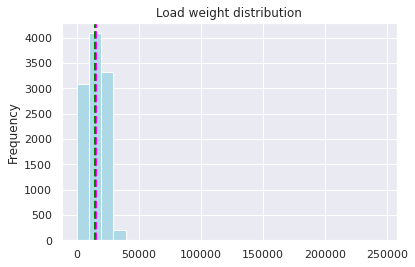

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
sns.set()

site_data['load_weight'].plot.hist(title='Load weight distribution', color='lightblue', bins=25)  
plt.axvline(site_data['load_weight'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(site_data['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

In [27]:
# view total data we have
site_data.shape

(10693, 2)

In [28]:
# find max values and min values
print(f"max value is {site_data['load_weight'].max()}")
print(f"min value is {site_data['load_weight'].min()}")

max value is 245540.0
min value is 0.0


In [29]:
# calculate outlier and remove them from the dataframe

#define quantile from dataframe
q1 = site_data['load_weight'].quantile(q=.25)
q3 = site_data['load_weight'].quantile(q=.75)

# use IQR method
IQR = site_data['load_weight'].apply(stats.iqr)

In [30]:
# view 0.25 quantile load weight
q1

8820.0

In [31]:
# view 0.75 quantile load weight
q3

21660.0

In [32]:
# remove the outlier below 0.25 and above 0.75 quantile
data_site_clean = site_data[~((site_data['load_weight'] < (q1-1.5*IQR)) | (site_data['load_weight'] > (q3+1.5*IQR)))]

In [33]:
# new total data after removing outliers
data_site_clean.shape

(5356, 2)

In [34]:
# calculating outliers percentage
(site_data.shape[0] - data_site_clean.shape[0]) / site_data.shape[0] * 100

49.91115683157206

the outliers is around 49% of the dataset

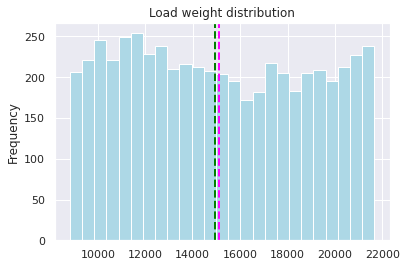

In [35]:
# new plot for cleaned data

data_site_clean['load_weight'].plot.hist(title='Load weight distribution', color='lightblue', bins=25)  
plt.axvline(data_site_clean['load_weight'].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(data_site_clean['load_weight'].median(), color='green', linestyle='dashed', linewidth=2)
plt.show()

## VI. Range, Variance, and Std deviation.

In [36]:
# Calculating range
data_range = data_site_clean['load_weight'].max() - data_site_clean['load_weight'].min()
data_range

12840.0

the range between the maximum and minimum values of the data is 12840

In [37]:
# Calculating variance
data_site_clean['load_weight'].var()

14185417.0321468

In [38]:
# Calculating std devation
data_site_clean['load_weight'].std()

3766.353280315961

## VII. Analysis for a new drop off site

### a. Calculate how much load_weight needed to make a new site

In [39]:
# create 95% confidence intervals from all the dropoff sites
stats.t.interval(alpha=0.95, df=len(cleaned_data['load_weight']),
              loc=np.mean(cleaned_data['load_weight']),
              scale=stats.sem(cleaned_data['load_weight']))

(12026.349512411238, 12196.377488690101)

From the confidence intervals we got, we should take the upper limits of the load which is 12196.38 to make sure we can handle all the weight.
We take the data from all the dropoff sites in austin.

## VIII. Hypothesis testing

h0: a day after 4th of july (us independence) which is 5th of july, there are more garbage produced compares to any other day outside thanksgiving and christmas

h1: a day after 4th of july (us independence) which is 5th of july, there are more garbage produced compares to any other day outside thanksgiving and christmas

In [40]:
date_span_group['load_weight'].median()

2236555.0

In [41]:
median_daily = date_span_group[(date_span_group['report_date'] < '2021-07-04') &
                (date_span_group['report_date'] > '2021-06-04')].median()

median_daily

/tmp/ipykernel_15976/1492061982.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  median_daily = date_span_group[(date_span_group['report_date'] < '2021-07-04') &


load_weight    2171550.0
dtype: float64

In [42]:
fifth_of_july = date_span_group[(date_span_group['report_date'] == '2021-07-05')]['load_weight']
fifth_of_july

161    1897290.0
Name: load_weight, dtype: float64

simplified

h0: load_weight on 5th of july (1897290.0) > mean of load_weight

h1: load_weight on 5th of july (1897290.0) <= mean of load_weight

In [43]:
t_stat,p_val = stats.ttest_1samp(date_span_group['load_weight'], 1897290.0)
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.4440386391896356
t-statistics: 0.14095519153962555


**Since our p-value is more than `0.05`, so we accept the null hypothesis**

# Analysis points

from the data we explore, we found that TDS Landfill has the most garbage dropped. The average of garbage collected on Austin per-day is around 12111 pounds.There are a couple of dropoff sites that has only 1 reported data, whether it is erroneous or not, we dont know. 

Every sunday, there seems to be no report, perhaps because nobody work on sunday. And on saturday, there are less garbage collected compares to normal workdays.

If the government of Austin decides to build a new Garbage sites, which we dont recommend, if the data to be trusted, it is better to maximize the productivty of the non productive dropoff sites. That said, if the government is inclined to build a new Garbage sites, it should at least able to handle the load for 12197 Pounds

